We want to test whether the data we get are from a normal distribution.
Basic outline:
1. Get data (scalars).
2. Estimate $\mu$ and $\sigma$ using moment conditions under the null. Use $\Omega$ that we can find from assuming normality.
3. Calculate $J_N$.
4. Test whether $J_N$ is really distributed as chi sq with $k-2$ degrees of freedom.

From Ethan:
Implement the test you've devised using =python=. You may want
to use =scipy.stats.distributions.chi2.cdf= and =scipy.optimize.minimize=.

In [31]:
import numpy as np
from scipy.stats import distributions as iid
from scipy.stats import logistic as logist
from scipy.optimize import minimize
from matplotlib import pyplot as plt

In [48]:
# X is normally distributed with mean=1,sd=2.
X = iid.norm.rvs(loc=1, scale=2, size=1000)
# Y has a logistic distribution
Y = logist.rvs(size=1000)

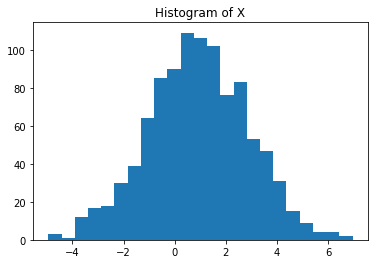

In [49]:
_ = plt.hist(X, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of X: Normally Distributed")
plt.show()

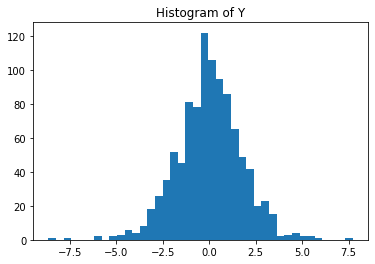

In [50]:
_ = plt.hist(Y, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of Y: Logistic Distribution")
plt.show()

In [76]:
def doublefact(n):
     if n <= 0:
         return 1
     else:
         return n * doublefactorial(n-2)

In [85]:
def omega_est(X,k):
    N = X.shape[0] # sample size
    xbar = np.mean(X) # sample mean
    ssr = 0
    for x in X:
        ssr = ssr + (x - xbar)**2
    s2 = (1/(N-1))*ssr # sample variance
    # by setting Omega to zero, we only need to change for ->
    # i,j are both even or both odd
    Omega = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            # define constant for when both are even
            constant = doublefact(i+j-1)-doublefact(i-1)*doublefact(j-1)
            if i % 2 == 0: # i is even
                if j % 2 == 0: # j is also even
                    Omega[i,j] = s2**((i+j)/2)*constant
            if i % 2 == 1: # i is odd
                if j % 2 == 1: # j is also odd
                    Omega[i,j] = s2**((i+j)/2)*doublefact(i+j-1)
    return Omega

In [86]:
omega_est(X,4)

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   3.79250359,   0.        ,  43.14925046],
       [  0.        ,   0.        ,  28.76616698,   0.        ],
       [  0.        ,  43.14925046,   0.        , 818.21843663]])

In [ ]:
def norm_gmm(X,k):
    """X is data. k is number of moment restrictions."""
    omegahat = omega_est(X,k)
    